The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine.

The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.

Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean

Ambient temperature (AT) C â€“6.23 37.10 17.71

Ambient pressure (AP) mbar 985.85 1036.56 1013.07

Ambient humidity (AH) (%) 24.08 100.20 77.87

Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93

Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56

Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43

Turbine after temperature (TAT) C 511.04 550.61 546.16

Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06

Turbine energy yield (TEY) MWH 100.02 179.50 133.51

Carbon monoxide (CO) mg/m3 0.00 44.10 2.37

## Load data and libraries

In [1]:
import pandas as pd
import numpy as npd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split


#Load data
df = pd.read_csv('/content/gas_turbines.csv.crdownload')
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [2]:
df.shape

(5439, 11)

In [3]:

df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [4]:


df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,5439.000000,5439.000000,5439.000000,5439.000000,5439.000000,5439.000000,5439.000000,5439.000000,5439.000000,5438.000000,5438.000000
mean,19.346426,1011.665038,76.602449,4.539610,25.432179,1083.402611,545.985852,133.019187,12.043459,2.282550,68.783981
std,8.056653,6.432333,14.477584,0.723269,4.089602,17.067254,7.558598,15.572078,1.072581,2.419684,10.544389
min,0.522300,985.850000,30.344000,3.200700,18.100000,1025.600000,513.060000,102.560000,9.928600,0.007505,42.093000
25%,12.557500,1007.900000,65.875000,4.117850,23.118000,1074.900000,545.680000,124.385000,11.424000,1.087000,62.289250
50%,20.658000,1011.100000,79.159000,4.362700,25.450000,1090.000000,549.910000,133.780000,12.088000,1.605800,67.378000
75%,25.634000,1015.000000,88.521000,4.871950,26.596000,1094.800000,550.080000,135.125000,12.339000,2.952600,73.685750
max,34.929000,1031.800000,100.180000,7.554900,37.402000,1100.800000,550.530000,174.610000,15.081000,44.103000,119.790000


## EDA & Feature Engineering

In [5]:
#check for misssing values
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      1
NOX     1
dtype: int64

In [6]:
df.isna().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO       True
NOX      True
dtype: bool

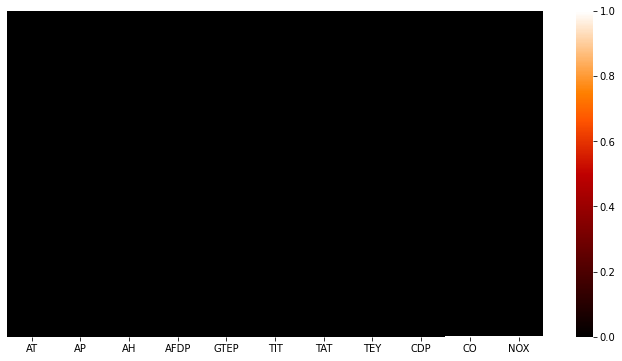

In [7]:

plt.rcParams['figure.figsize']=(12,6)
sns.heatmap(df.isna(), cmap =('gist_heat'), yticklabels=False)

In [8]:
#check for duplicate values
df[df.duplicated()].shape

(0, 11)

In [9]:

df[df.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [10]:
df.nunique()

AT      4983
AP       439
AH      5130
AFDP    4714
GTEP    4083
TIT      599
TAT     1295
TEY     2209
CDP     2357
CO      5100
NOX     4997
dtype: int64




## Observation:

No missing values

No duplicate values

 All dtypes are correct.

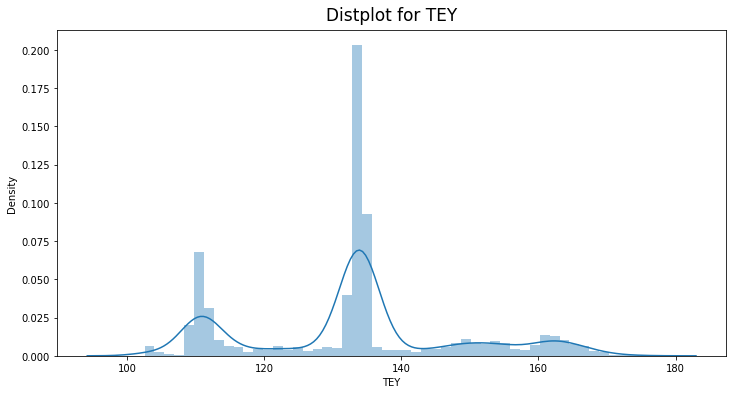

In [11]:

#Target variable
plt.title('Distplot for TEY', fontsize=17, y = 1.01)
sns.distplot(df['TEY'])

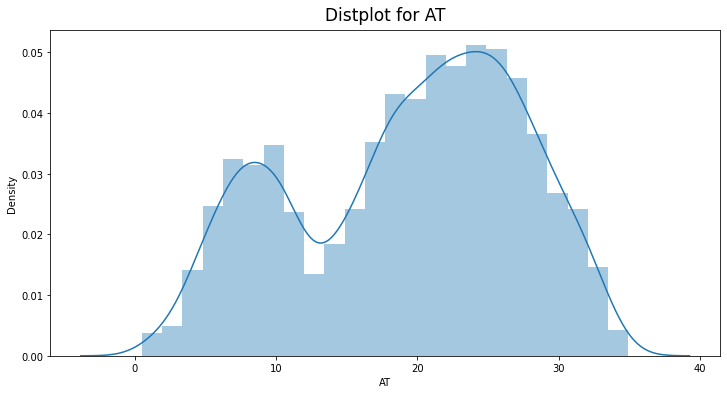

In [12]:
plt.title('Distplot for AT', fontsize=17, y = 1.01)
sns.distplot(df['AT'])

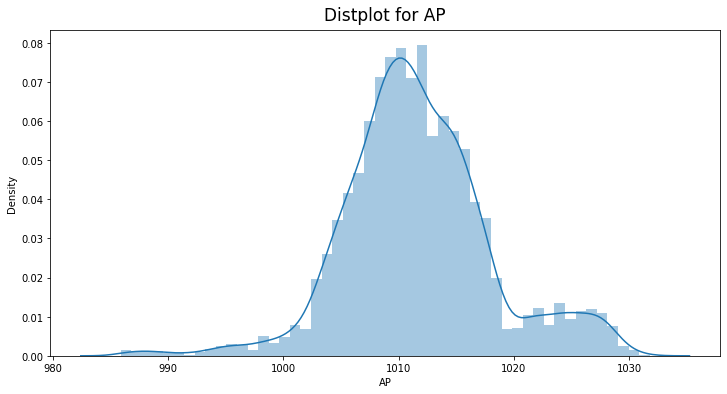

In [13]:
plt.title('Distplot for AP', fontsize=17, y = 1.01)
sns.distplot(df['AP'])

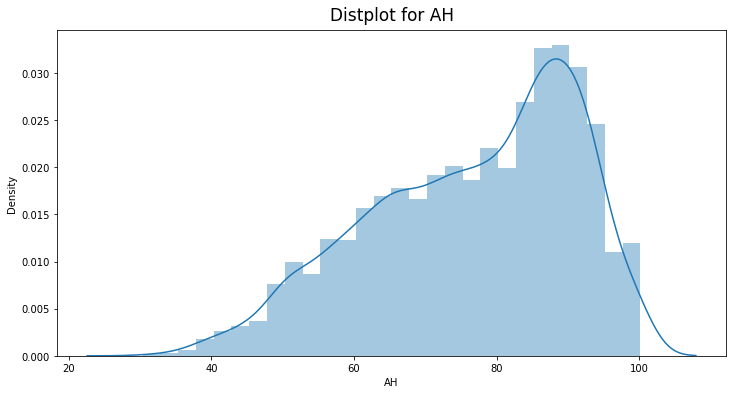

In [14]:
plt.title('Distplot for AH', fontsize=17, y = 1.01)
sns.distplot(df['AH'])

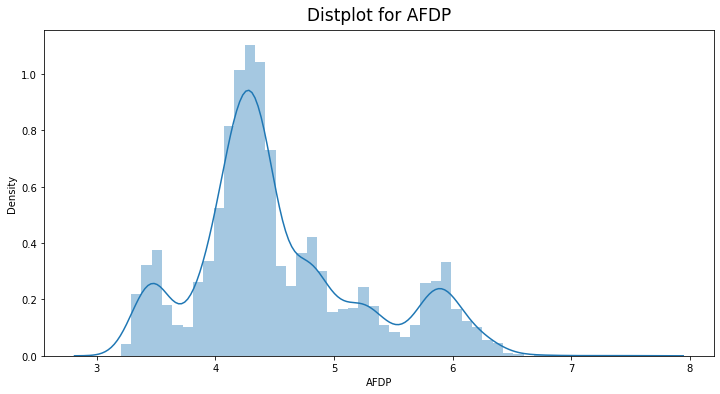

In [15]:
plt.title('Distplot for AFDP', fontsize=17, y = 1.01)
sns.distplot(df['AFDP'])

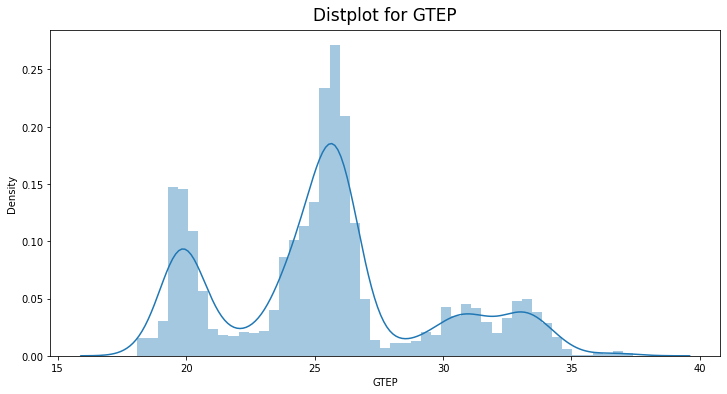

In [16]:
plt.title('Distplot for GTEP', fontsize=17, y = 1.01)
sns.distplot(df['GTEP'])

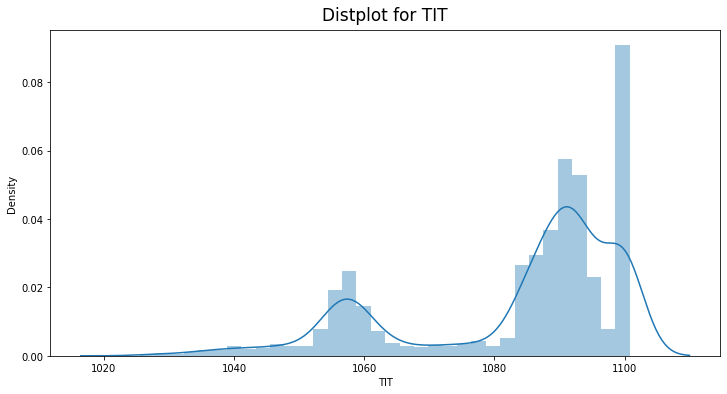

In [17]:
plt.title('Distplot for TIT', fontsize=17, y = 1.01)
sns.distplot(df['TIT'])

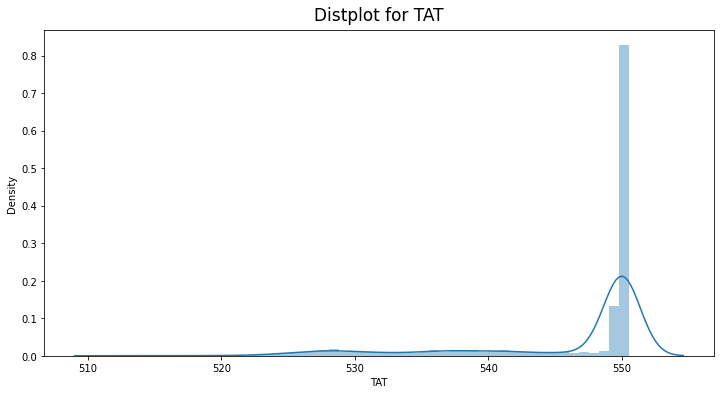

In [18]:
plt.title('Distplot for TAT', fontsize=17, y = 1.01)
sns.distplot(df['TAT'])

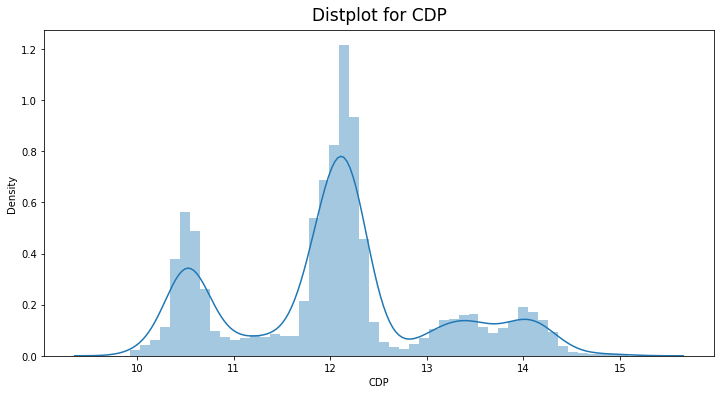

In [19]:
plt.title('Distplot for CDP', fontsize=17, y = 1.01)
sns.distplot(df['CDP'])

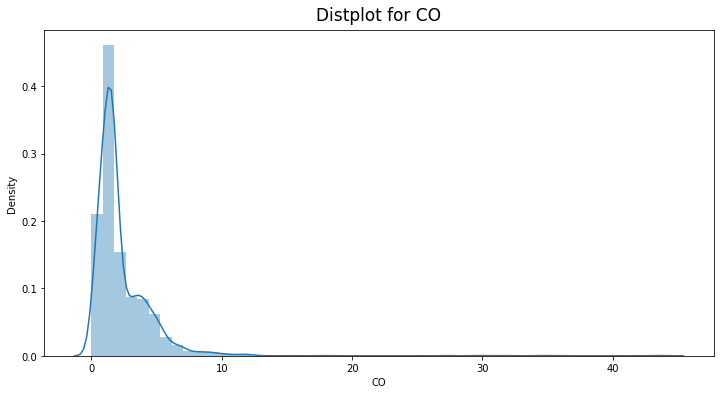

In [20]:
plt.title('Distplot for CO', fontsize=17, y = 1.01)
sns.distplot(df['CO'])

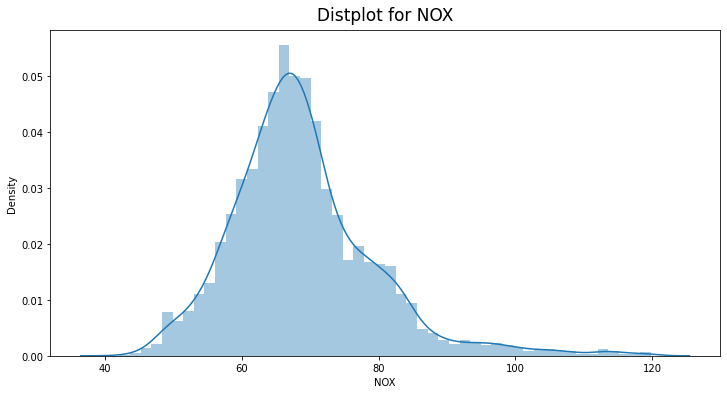

In [21]:
plt.title('Distplot for NOX', fontsize=17, y = 1.01)
sns.distplot(df['NOX'])

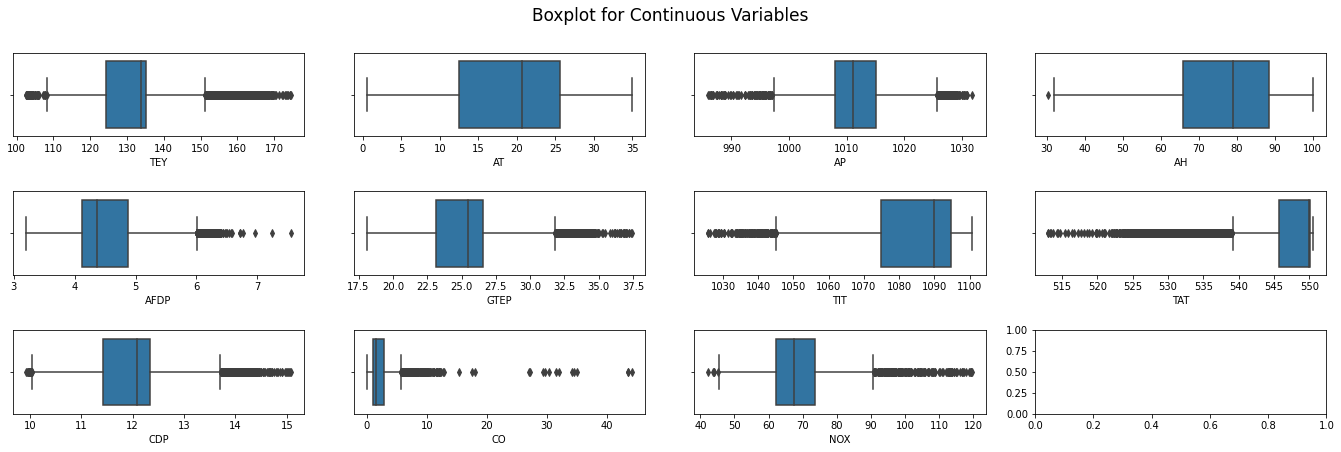

In [22]:
#check for outliers
fig, ax=plt.subplots(3,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(df.TEY, ax=ax[0,0])
sns.boxplot(df.AT, ax=ax[0,1])
sns.boxplot(df.AP, ax=ax[0,2])
sns.boxplot(df.AH, ax=ax[0,3])
sns.boxplot(df.AFDP, ax=ax[1,0])
sns.boxplot(df.GTEP, ax=ax[1,1])
sns.boxplot(df.TIT, ax=ax[1,2])
sns.boxplot(df.TAT, ax=ax[1,3])
sns.boxplot(df.CDP, ax=ax[2,0])
sns.boxplot(df.CO, ax=ax[2,1])
sns.boxplot(df.NOX, ax=ax[2,2])
plt.suptitle("Boxplot for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

We have a noisy data

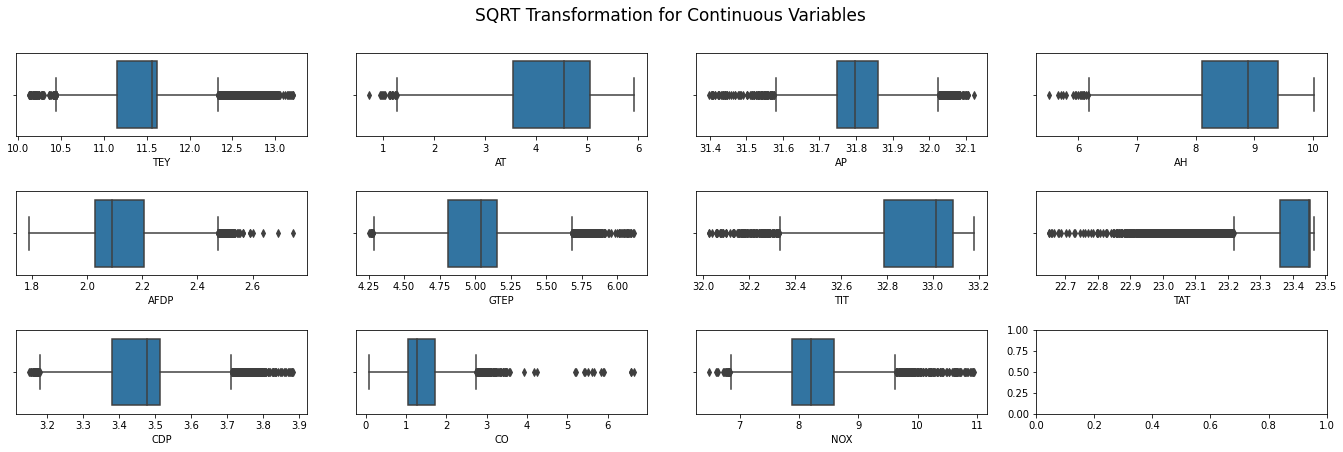

In [23]:
import numpy as np
fig, ax=plt.subplots(3,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.sqrt(df.TEY), ax=ax[0,0])
sns.boxplot(np.sqrt(df.AT), ax=ax[0,1])
sns.boxplot(np.sqrt(df.AP), ax=ax[0,2])
sns.boxplot(np.sqrt(df.AH), ax=ax[0,3])
sns.boxplot(np.sqrt(df.AFDP), ax=ax[1,0])
sns.boxplot(np.sqrt(df.GTEP), ax=ax[1,1])
sns.boxplot(np.sqrt(df.TIT), ax=ax[1,2])
sns.boxplot(np.sqrt(df.TAT), ax=ax[1,3])
sns.boxplot(np.sqrt(df.CDP), ax=ax[2,0])
sns.boxplot(np.sqrt(df.CO), ax=ax[2,1])
sns.boxplot(np.sqrt(df.NOX), ax=ax[2,2])
plt.suptitle("SQRT Transformation for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

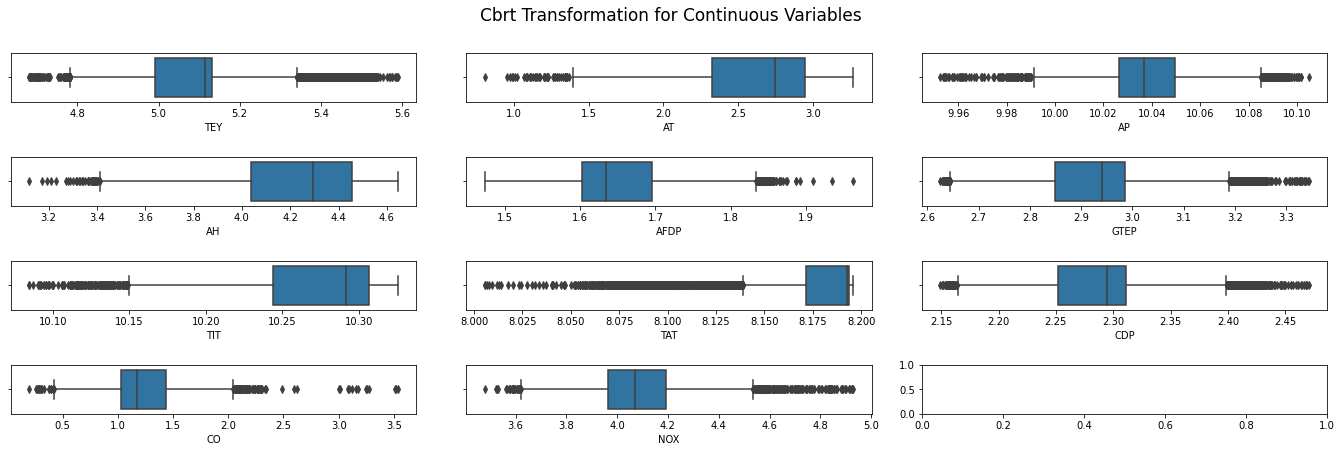

In [24]:
fig, ax=plt.subplots(4,3, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.cbrt(df.TEY), ax=ax[0,0])
sns.boxplot(np.cbrt(df.AT), ax=ax[0,1])
sns.boxplot(np.cbrt(df.AP), ax=ax[0,2])
sns.boxplot(np.cbrt(df.AH), ax=ax[1,0])
sns.boxplot(np.cbrt(df.AFDP), ax=ax[1,1])
sns.boxplot(np.cbrt(df.GTEP), ax=ax[1,2])
sns.boxplot(np.cbrt(df.TIT), ax=ax[2,0])
sns.boxplot(np.cbrt(df.TAT), ax=ax[2,1])
sns.boxplot(np.cbrt(df.CDP), ax=ax[2,2])
sns.boxplot(np.cbrt(df.CO), ax=ax[3,0])
sns.boxplot(np.cbrt(df.NOX), ax=ax[3,1])
plt.suptitle("Cbrt Transformation for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

None of the transformations are helpful to treat the outliers.

Dependency of Target variable on diff Features

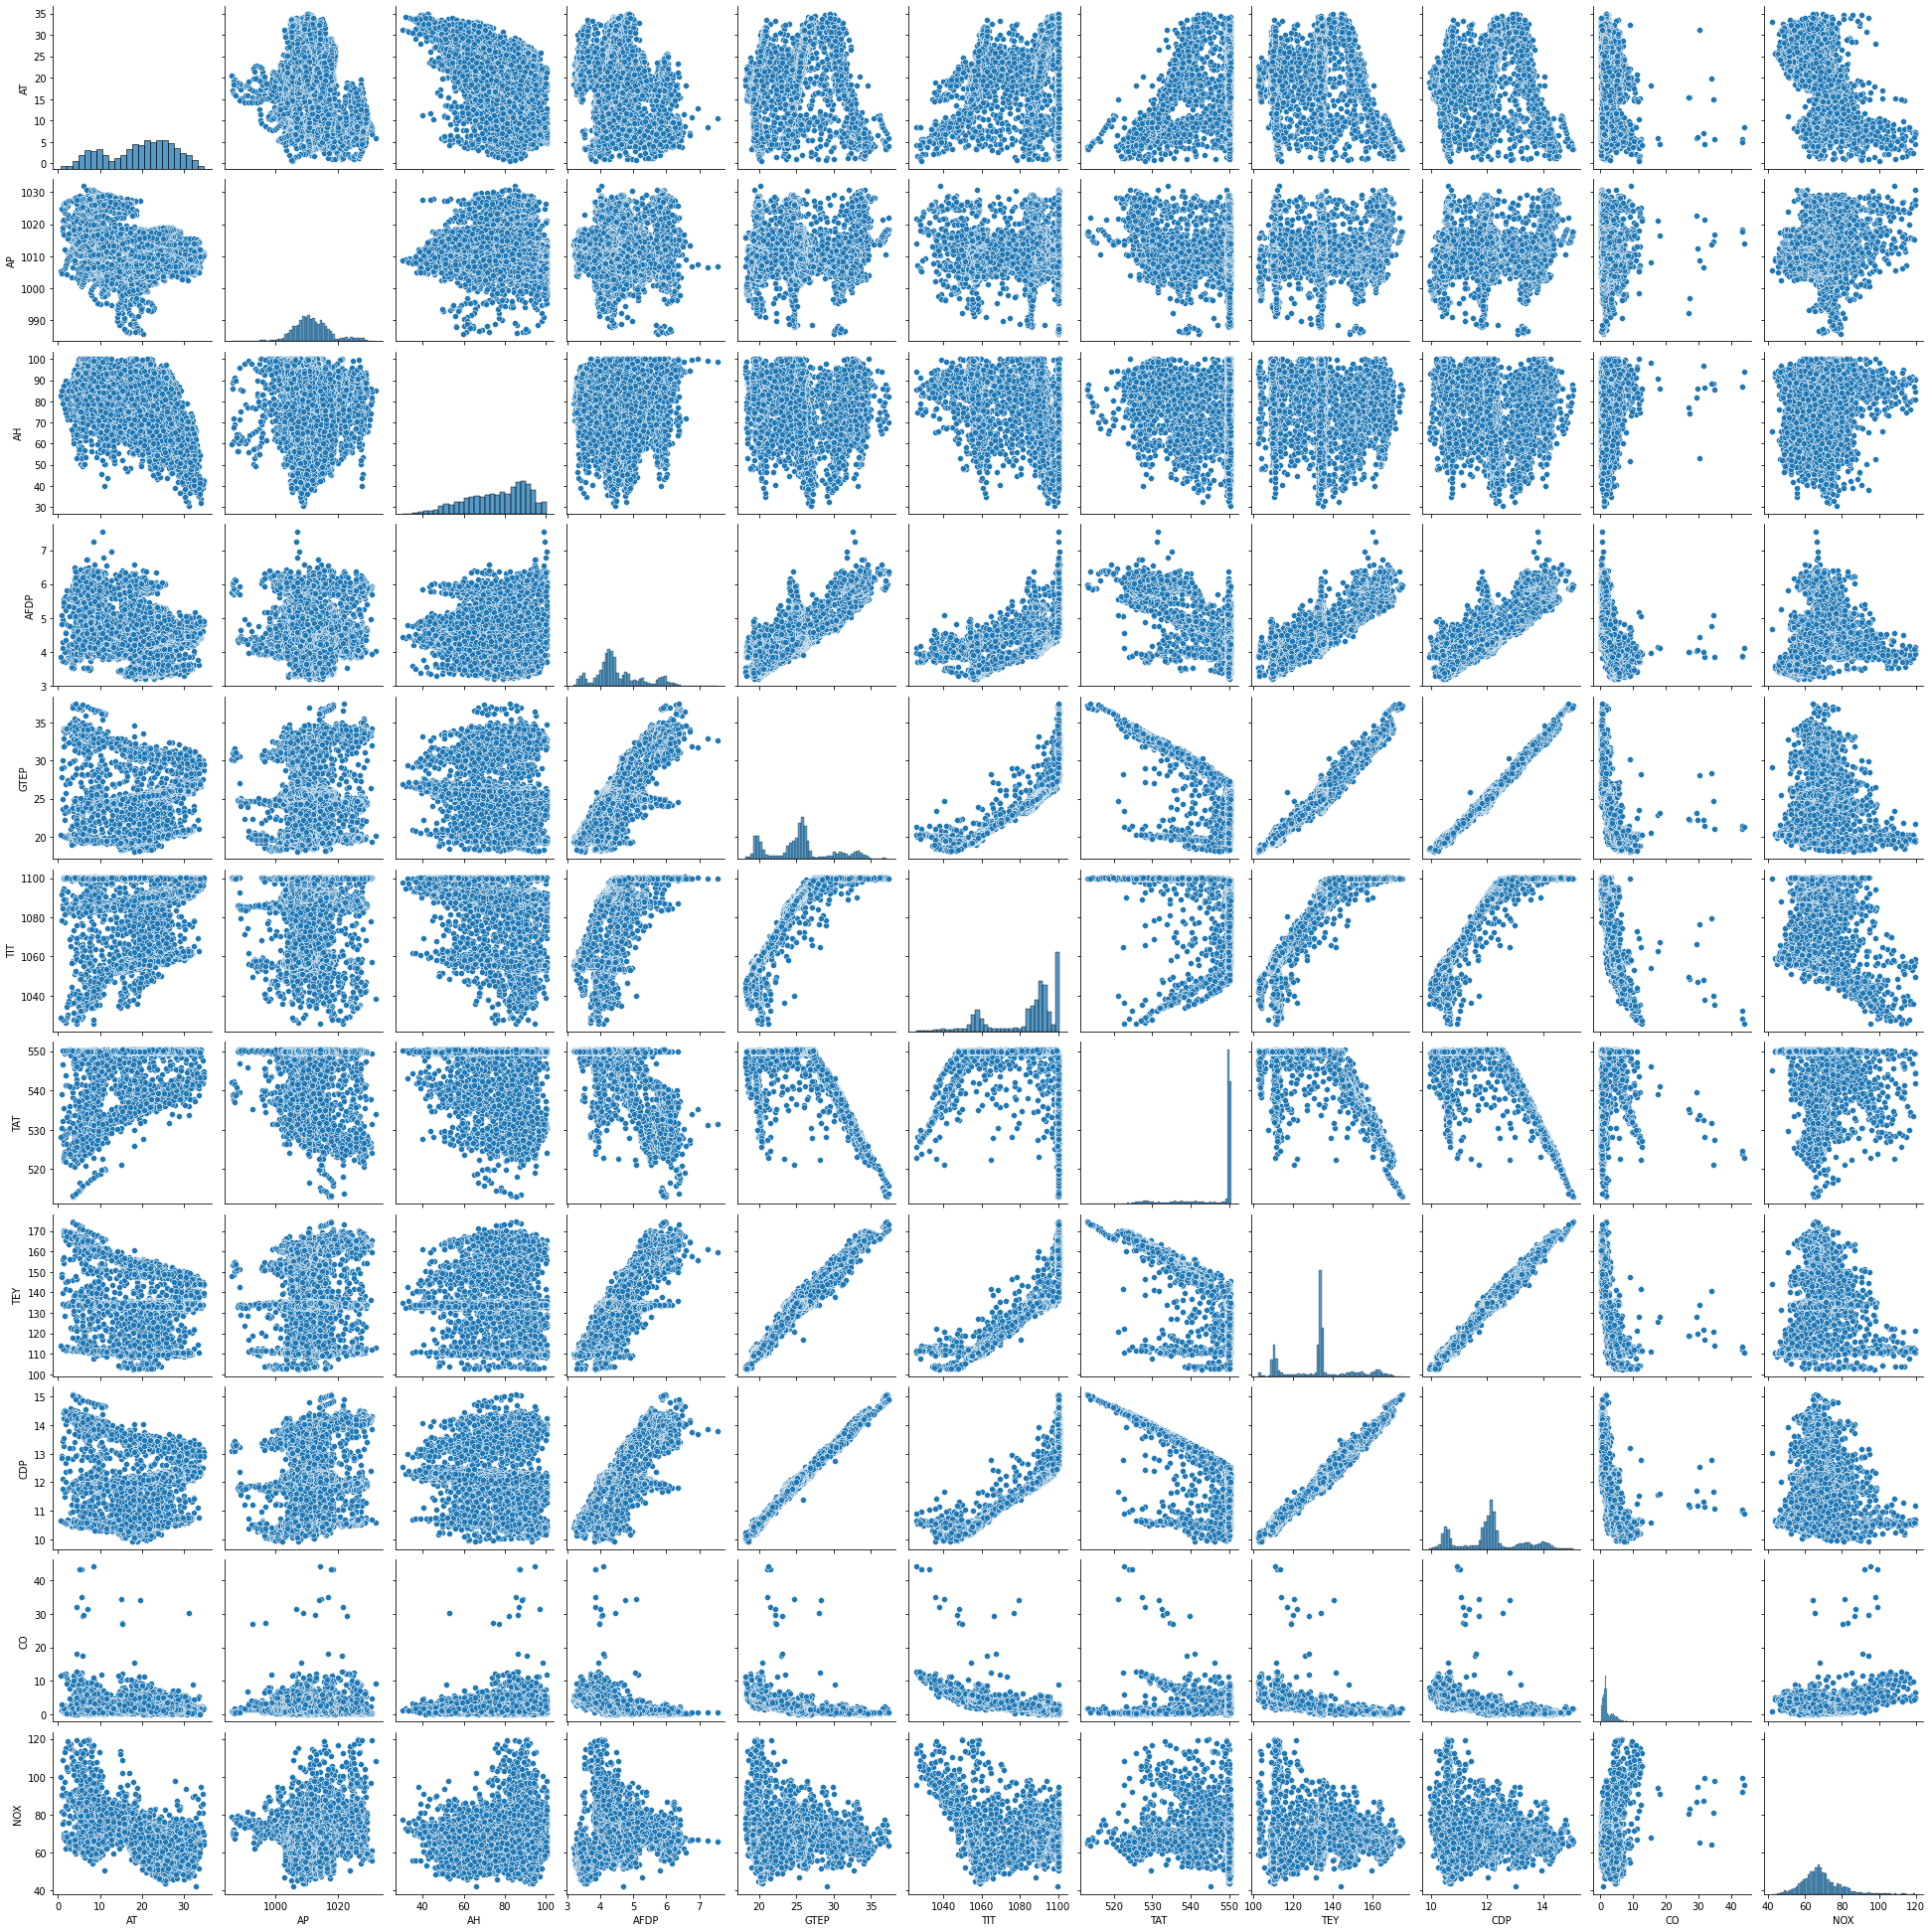

In [25]:
sns.pairplot(df)

In [26]:
corr = pd.DataFrame(data = df.corr().iloc[:,7], index=df.columns)
corr = corr.sort_values(by='TEY', ascending=False)
corr

,TEY
TEY,1.000000
CDP,0.989225
GTEP,0.981123
TIT,0.873422
AFDP,0.830217
AP,0.117145
NOX,-0.033435
AH,-0.104301
AT,-0.218593
CO,-0.567004


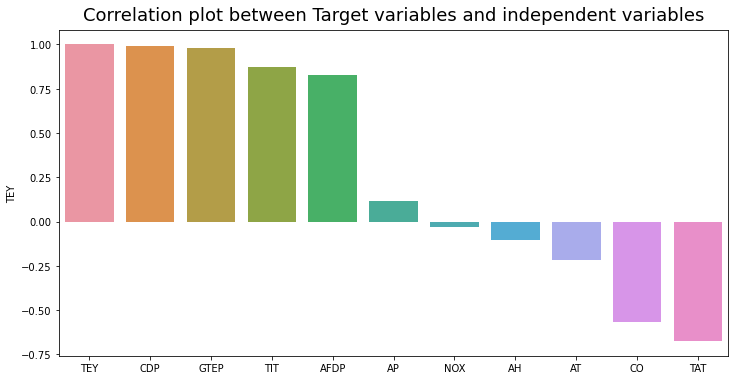

In [27]:
plt.title("Correlation plot between Target variables and independent variables", y=1.01, fontsize=18)
sns.barplot(x = corr.index, y = corr.TEY)

Text(0.5, 1.0, 'Correlation Map of variables')

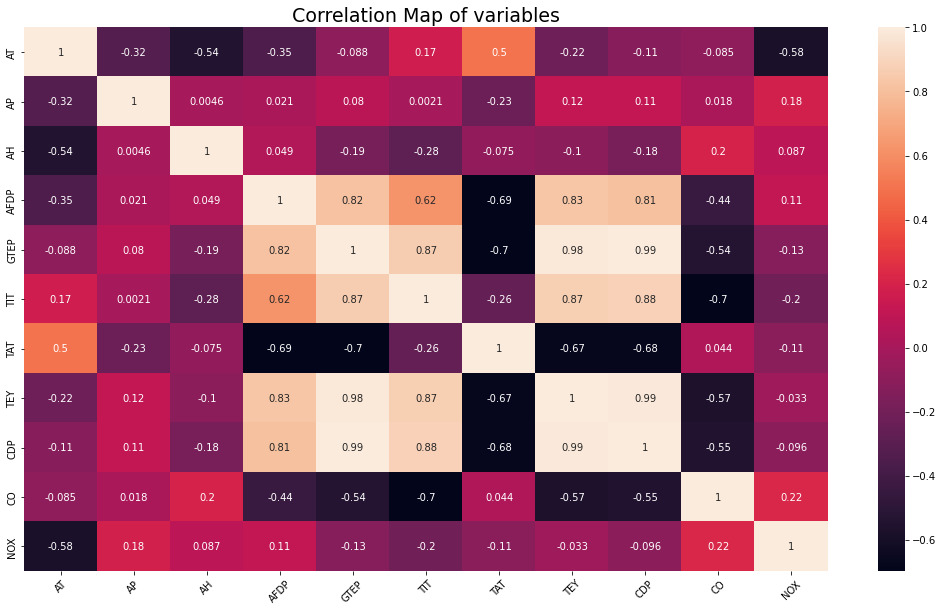

In [28]:
fig= plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(), annot=True);
plt.xticks(rotation=45)
plt.title("Correlation Map of variables", fontsize=19)

In [29]:
!pip install ppscore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13167 sha256=085481d0be9c56ae5e2f2c35f961cefcb88e077ae2e1b30152f9d4352aedef7b
  Stored in directory: /root/.cache/pip/wheels/df/f9/57/05d08363f49803608cd482928dce0a93d3aedcaddd3007c97d
Successfully built ppscore


In [30]:
import ppscore as PPS
score = PPS.matrix(df)
score_s = score[score['y']=='TEY']
score_s.sort_values(by="ppscore", ascending=False)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
84,TEY,TEY,1.000000,predict_itself,True,None,0.000000,1.000000,None
95,CDP,TEY,0.870923,regression,True,mean absolute error,10.779710,1.391416,DecisionTreeRegressor()
51,GTEP,TEY,0.842896,regression,True,mean absolute error,10.779710,1.693539,DecisionTreeRegressor()
62,TIT,TEY,0.756964,regression,True,mean absolute error,10.779710,2.619862,DecisionTreeRegressor()
40,AFDP,TEY,0.333206,regression,True,mean absolute error,10.779710,7.187849,DecisionTreeRegressor()
106,CO,TEY,0.242142,regression,True,mean absolute error,10.775752,8.166487,DecisionTreeRegressor()
73,TAT,TEY,0.158616,regression,True,mean absolute error,10.779710,9.069879,DecisionTreeRegressor()
7,AT,TEY,0.000000,regression,True,mean absolute error,10.779710,14.615255,DecisionTreeRegressor()
18,AP,TEY,0.000000,regression,True,mean absolute error,10.779710,12.014681,DecisionTreeRegressor()
29,AH,TEY,0.000000,regression,True,mean absolute error,10.779710,16.200743,DecisionTreeRegressor()


Text(0.5, 1.01, 'PPScore of each feature with Target variable')

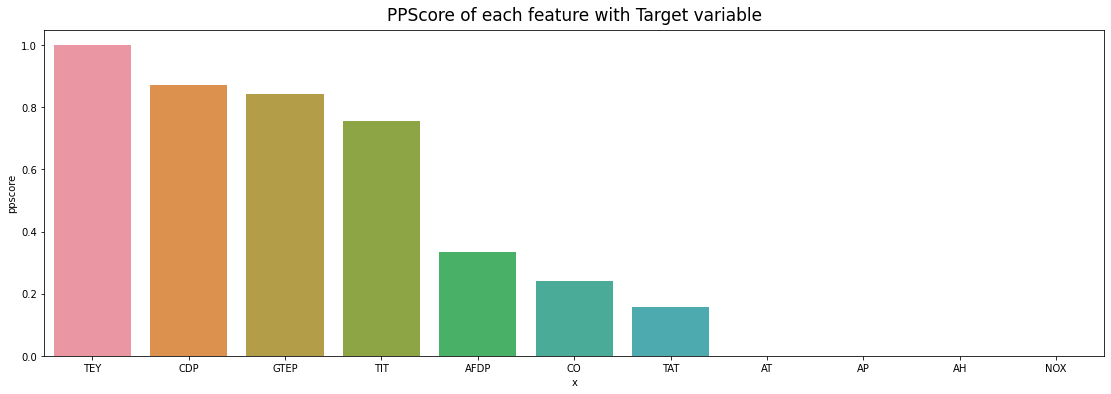

In [31]:
plt.rcParams['figure.figsize']=(19,6)
sns.barplot(x='x', y='ppscore', data=score_s.sort_values(by='ppscore', ascending=False))
plt.title("PPScore of each feature with Target variable", fontsize=17, y=1.01)

Observation:

From correlation matrix as well as ppscore we can clearly see that TEY is highly dependent on 'CDP', 'GTEP', 'TIT'.


We can drop 'AT', 'AP', 'AH', 'NOX' as they have very less impact on dependent variables.

In [35]:
#reset index after dropping outliers
df = df.reset_index()
df = df.drop('index', axis = 1)
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
5434,18.2420,1015.0,78.731,3.5051,20.521,1062.4,549.92,114.65,10.764,4.7746,65.115
5435,17.3860,1014.8,81.153,3.3668,19.241,1054.6,549.94,109.23,10.465,5.7448,64.916
5436,16.4780,1014.7,83.775,4.2028,24.641,1086.6,550.11,133.22,11.993,3.1926,70.707
5437,15.7700,1014.3,85.200,4.2771,25.134,1089.7,549.75,135.38,12.144,2.4871,71.316


In [36]:
df = df.drop(['AT', 'AP', 'AH', 'NOX'], axis=1)

In [37]:
df.shape

(5439, 7)

Converting independent features into normalised and standardized data

In [38]:
#Standardize & Normalize the data
norm = MinMaxScaler()
std = StandardScaler()

df_norm = pd.DataFrame(norm.fit_transform(df), columns=df.columns)            #data between -3 to +3
df_std = pd.DataFrame(std.fit_transform(df), columns=df.columns)

In [39]:
#we will take a small model as this is large data and will take huge amount of time to build model
#to reandomly shuffle and select a % of data
temp = df_std.sample(frac=1)          #shuffle all the data
temp_s = df_std.sample(frac=0.1)      #shuffle and select only 10% of the data randomly to train
temp_s

,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
869,0.294095,0.143015,0.574099,0.520534,0.499710,0.172069,-0.567668
3249,-0.576477,0.150107,0.486203,0.590660,-0.010224,0.121718,-0.280744
3475,-1.705898,-1.388082,-1.588135,0.531119,-1.493784,-1.528659,1.268320
3390,-0.428386,0.153775,0.574099,0.539058,-0.015361,0.151556,-0.265080
3867,-0.332562,0.193636,0.603397,0.507303,0.049504,0.204703,-0.466984
...,...,...,...,...,...,...,...
5044,-0.425620,-0.012760,0.392448,0.523181,-0.014719,0.076962,-0.116948
1816,-0.950231,-1.680068,-2.115509,0.412039,-1.827746,-1.919155,1.058851
24,-0.979546,-0.977980,-0.761916,0.378961,-0.686496,-0.799509,0.757999
2488,-0.406262,-1.443838,-1.693610,0.548320,-1.556723,-1.609779,0.557459


Splitting data into target variable and independent variable

In [40]:
x = temp_s.drop('TEY', axis=1)
y = temp_s['TEY']
x


,AFDP,GTEP,TIT,TAT,CDP,CO
869,0.294095,0.143015,0.574099,0.520534,0.172069,-0.567668
3249,-0.576477,0.150107,0.486203,0.590660,0.121718,-0.280744
3475,-1.705898,-1.388082,-1.588135,0.531119,-1.528659,1.268320
3390,-0.428386,0.153775,0.574099,0.539058,0.151556,-0.265080
3867,-0.332562,0.193636,0.603397,0.507303,0.204703,-0.466984
...,...,...,...,...,...,...
5044,-0.425620,-0.012760,0.392448,0.523181,0.076962,-0.116948
1816,-0.950231,-1.680068,-2.115509,0.412039,-1.919155,1.058851
24,-0.979546,-0.977980,-0.761916,0.378961,-0.799509,0.757999
2488,-0.406262,-1.443838,-1.693610,0.548320,-1.609779,0.557459


Creating train and test data for model validation

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [42]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((408, 6), (136, 6), (408,), (136,))

Build a Mode

In [43]:
# Importing the necessary packages
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
tf.config.experimental.list_physical_devices('GPU')   

[]

In [44]:
# create model with 2 hidden layers
def create_model_two_hidden_layers():
    model = Sequential()
    model.add(Dense(5, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))
    
    adam=Adam(lr=0.001)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [45]:
model1 = create_model_two_hidden_layers()
print("Here is the summary of the model:")
model1.summary()

Here is the summary of the model:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 35        
                                                                 
 dense_1 (Dense)             (None, 6)                 36        
                                                                 
 dense_2 (Dense)             (None, 10)                70        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________


In [46]:
#create a model with 3 hidden layers
def create_model_three_hidden_layers():
    model = Sequential()
    model.add(Dense(32, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))
    
    adam=Adam(lr=0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model


In [47]:
model2 = create_model_three_hidden_layers()
print("Here is the summary of the model2:")
model2.summary()

Here is the summary of the model2:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                224       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 11,841
Trainable params: 11,841
Non-trainable params: 0
_________________________________________________________________


In [48]:
%%time
epochs=500
batch_size=50

print("Here is the summary of this model:")
model2.summary()

with tf.device('/GPU:0'):
  model2.fit(x_train,y_train, verbose = 0,batch_size = batch_size,epochs = epochs, shuffle=True)


Here is the summary of this model:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                224       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 11,841
Trainable params: 11,841
Non-trainable params: 0
_________________________________________________________________
CPU times: user

In [49]:
print("Predicted values:")
model2.predict(x_test[:10])

Predicted values:
1/1 [==============================] - 0s 74ms/step


array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

In [50]:
print('Actual values')
y_test[:10]

Actual values


3223    0.017393
2504   -1.428919
1806    1.133595
2236   -0.018573
5236   -0.010224
3647   -0.011508
5245    0.045009
1886    1.377002
3684    0.044366
1305   -1.419927
Name: TEY, dtype: float64

In [51]:

loss, mae, mse, mape = model2.evaluate(x_train, y_train)
print('\n', "Results for model 2:", '\n', "Training Loss:", loss, '\n', "Training Mean Absolute Error:" , mae, '\n', "Training Mean Squared Error:", mse)


13/13 [==============================] - 0s 1ms/step - loss: nan - mse: nan - mae: nan - mape: nan

 Results for model 2: 
 Training Loss: nan 
 Training Mean Absolute Error: nan 
 Training Mean Squared Error: nan


In [52]:
loss, mae, mse, mape = model2.evaluate(x_test, y_test)
print('\n', "Results for model 2:", '\n', "Test Loss:", loss, '\n', "Test Mean Absolute Error:" , mae, '\n', "Test Mean Squared Error:", mse)



5/5 [==============================] - 0s 3ms/step - loss: nan - mse: nan - mae: nan - mape: nan

 Results for model 2: 
 Test Loss: nan 
 Test Mean Absolute Error: nan 
 Test Mean Squared Error: nan


In [53]:


# Create the model
#get best value for batch size and epochs by hyperparameter tuning
model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0)
# Define the grid search parameters
batch_size = [30,50,70]
epochs = [300,500,800]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=30, epochs=300...................................
[CV 1/5; 1/9] END ......batch_size=30, epochs=300;, score=nan total time=  11.4s
[CV 2/5; 1/9] START batch_size=30, epochs=300...................................
[CV 2/5; 1/9] END ......batch_size=30, epochs=300;, score=nan total time=   5.1s
[CV 3/5; 1/9] START batch_size=30, epochs=300...................................
[CV 3/5; 1/9] END ......batch_size=30, epochs=300;, score=nan total time=   4.6s
[CV 4/5; 1/9] START batch_size=30, epochs=300...................................


[CV 4/5; 1/9] END ......batch_size=30, epochs=300;, score=nan total time=   4.7s
[CV 5/5; 1/9] START batch_size=30, epochs=300...................................


[CV 5/5; 1/9] END ......batch_size=30, epochs=300;, score=nan total time=   6.2s
[CV 1/5; 2/9] START batch_size=30, epochs=500...................................
[CV 1/5; 2/9] END ......batch_size=30, epochs=500;, score=nan total time=  10.8s
[CV 2/5; 2/9] START batch_size=30, epochs=500...................................
[CV 2/5; 2/9] END ......batch_size=30, epochs=500;, score=nan total time=  10.9s
[CV 3/5; 2/9] START batch_size=30, epochs=500...................................
[CV 3/5; 2/9] END ......batch_size=30, epochs=500;, score=nan total time=   7.4s
[CV 4/5; 2/9] START batch_size=30, epochs=500...................................
[CV 4/5; 2/9] END ......batch_size=30, epochs=500;, score=nan total time=   7.3s
[CV 5/5; 2/9] START batch_size=30, epochs=500...................................
[CV 5/5; 2/9] END ......batch_size=30, epochs=500;, score=nan total time=   7.4s
[CV 1/5; 3/9] START batch_size=30, epochs=800...................................
[CV 1/5; 3/9] END ......batc

In [54]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : nan, using {'batch_size': 30, 'epochs': 300}
nan,nan with: {'batch_size': 30, 'epochs': 300}
nan,nan with: {'batch_size': 30, 'epochs': 500}
nan,nan with: {'batch_size': 30, 'epochs': 800}
nan,nan with: {'batch_size': 50, 'epochs': 300}
nan,nan with: {'batch_size': 50, 'epochs': 500}
nan,nan with: {'batch_size': 50, 'epochs': 800}
nan,nan with: {'batch_size': 70, 'epochs': 300}
nan,nan with: {'batch_size': 70, 'epochs': 500}
nan,nan with: {'batch_size': 70, 'epochs': 800}


In [55]:
#get best value for learning rate and dropuout by hyperparameter tuning

# Defining the model
%%time
def create_model_three_hidden_layers(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(32,input_dim = 6,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(128,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'mse', optimizer = adam,metrics = ['mse', 'mae', 'mape'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0,batch_size = 70,epochs = 300)

# Define the grid search parameters
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 0)
grid_result = grid.fit(x_train,y_train)


CPU times: user 2min 53s, sys: 10.4 s, total: 3min 3s
Wall time: 2min 49s


In [56]:
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 0)
grid_result = grid.fit(x_train,y_train)

In [57]:
# Defining the model
#get best value for kernel initializer and activation func by hyperparameter tuning
%%time
def create_model_three_hidden_layers(activation_function,init):
    model = Sequential()
    model.add(Dense(32,input_dim = 6,kernel_initializer = init,activation = activation_function))

    model.add(Dense(32,kernel_initializer = init,activation = activation_function))
    
    model.add(Dense(64,kernel_initializer = init,activation = activation_function))
    
    model.add(Dense(128,kernel_initializer = init,activation = activation_function))
    
    model.add(Dense(1))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'mse',optimizer = adam,metrics = ['mse', 'mae', 'mape'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0,batch_size = 70,epochs = 300)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 0)
grid_result = grid.fit(x_train,y_train)

CPU times: user 3min 36s, sys: 13.1 s, total: 3min 49s
Wall time: 3min 19s


In [58]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : nan, using {'activation_function': 'softmax', 'init': 'uniform'}
nan,nan with: {'activation_function': 'softmax', 'init': 'uniform'}
nan,nan with: {'activation_function': 'softmax', 'init': 'normal'}
nan,nan with: {'activation_function': 'softmax', 'init': 'zero'}
nan,nan with: {'activation_function': 'relu', 'init': 'uniform'}
nan,nan with: {'activation_function': 'relu', 'init': 'normal'}
nan,nan with: {'activation_function': 'relu', 'init': 'zero'}
nan,nan with: {'activation_function': 'tanh', 'init': 'uniform'}
nan,nan with: {'activation_function': 'tanh', 'init': 'normal'}
nan,nan with: {'activation_function': 'tanh', 'init': 'zero'}
nan,nan with: {'activation_function': 'linear', 'init': 'uniform'}
nan,nan with: {'activation_function': 'linear', 'init': 'normal'}
nan,nan with: {'activation_function': 'linear', 'init': 'zero'}


In [59]:
# Defining the model
#get best value for neuron by hyperparameter tuning
%%time
def create_model_three_hidden_layers(neuron1,neuron2,neuron3,neuron4):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 6,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(neuron3,input_dim = neuron2,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(neuron4,input_dim = neuron3,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(1))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'mse',optimizer = adam,metrics = ['mse', 'mae', 'mape'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0,batch_size = 70,epochs = 300)

# Define the grid search parameters

neuron1 = [8,16,32]
neuron2 = [32,64,128]
neuron3 = [32,64,128]
neuron4 = [32,64,128]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2, neuron3 = neuron3, neuron4 = neuron4)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 0)
grid_result = grid.fit(x_train,y_train)

CPU times: user 24min 6s, sys: 1min 25s, total: 25min 32s
Wall time: 22min 13s


In [60]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : nan, using {'neuron1': 8, 'neuron2': 32, 'neuron3': 32, 'neuron4': 32}
nan,nan with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 32, 'neuron4': 32}
nan,nan with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 32, 'neuron4': 64}
nan,nan with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 32, 'neuron4': 128}
nan,nan with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 64, 'neuron4': 32}
nan,nan with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 64, 'neuron4': 64}
nan,nan with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 64, 'neuron4': 128}
nan,nan with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 128, 'neuron4': 32}
nan,nan with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 128, 'neuron4': 64}
nan,nan with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 128, 'neuron4': 128}
nan,nan with: {'neuron1': 8, 'neuron2': 64, 'neuron3': 32, 'neuron4': 32}
nan,nan with: {'neuron1': 8, 'neuron2': 64, 'neuron3': 32, 'neuron4': 64}
nan,nan with: {'neuron1': 8, 'neuron2': 64, 'neuron3': 32, 'neuron4': 128}
nan,nan with: {'neuron1': 8

In [61]:
#create a model with 3 hidden layers with best hyperparameters
def create_model_three_hidden_layers():
    model = Sequential()
    model.add(Dense(8, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))
    
    adam=Adam(lr=0.001)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [62]:
%%time
epochs=300
batch_size=70

final_model=create_model_three_hidden_layers()

print("Here is the summary of our final model:")
final_model.summary()

with tf.device('/GPU:0'):
  final_model.fit(x_train,y_train, verbose = 0,batch_size = batch_size,epochs = epochs, shuffle=True)


Here is the summary of our final model:
Model: "sequential_607"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3034 (Dense)          (None, 8)                 56        
                                                                 
 dense_3035 (Dense)          (None, 128)               1152      
                                                                 
 dense_3036 (Dense)          (None, 64)                8256      
                                                                 
 dense_3037 (Dense)          (None, 128)               8320      
                                                                 
 dense_3038 (Dense)          (None, 1)                 129       
                                                                 
Total params: 17,913
Trainable params: 17,913
Non-trainable params: 0
_________________________________________________________________
CPU time

In [63]:
ssloss, mae, mse, mape = final_model.evaluate(x_train, y_train)
print('\n', "Results for final model :", '\n', "Training Loss:", loss, '\n', "Training Mean Absolute Error:" , mae, '\n', "Training Mean Squared Error:", mse)


13/13 [==============================] - 0s 1ms/step - loss: nan - mse: nan - mae: nan - mape: nan

 Results for final model : 
 Training Loss: nan 
 Training Mean Absolute Error: nan 
 Training Mean Squared Error: nan


In [64]:
# Defining the model
#get best value for neuron by hyperparameter tuning
%%time
def create_model_three_hidden_layers(neuron1,neuron2,neuron3,neuron4):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 6,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(neuron3,input_dim = neuron2,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(neuron4,input_dim = neuron3,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(1))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'mse',optimizer = adam,metrics = ['mse', 'mae', 'mape'])
    return model

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.3 µs


In [65]:
# Create the model

model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0,batch_size = 70,epochs = 300)

# Define the grid search parameters

neuron1 = [8,16,32]
neuron2 = [32,64,128]
neuron3 = [32,64,128]
neuron4 = [32,64,128]

In [66]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : nan, using {'neuron1': 8, 'neuron2': 32, 'neuron3': 32, 'neuron4': 32}
nan,nan with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 32, 'neuron4': 32}
nan,nan with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 32, 'neuron4': 64}
nan,nan with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 32, 'neuron4': 128}
nan,nan with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 64, 'neuron4': 32}
nan,nan with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 64, 'neuron4': 64}
nan,nan with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 64, 'neuron4': 128}
nan,nan with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 128, 'neuron4': 32}
nan,nan with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 128, 'neuron4': 64}
nan,nan with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 128, 'neuron4': 128}
nan,nan with: {'neuron1': 8, 'neuron2': 64, 'neuron3': 32, 'neuron4': 32}
nan,nan with: {'neuron1': 8, 'neuron2': 64, 'neuron3': 32, 'neuron4': 64}
nan,nan with: {'neuron1': 8, 'neuron2': 64, 'neuron3': 32, 'neuron4': 128}
nan,nan with: {'neuron1': 8

In [67]:
#create a model with 3 hidden layers with best hyperparameters
def create_model_three_hidden_layers():
    model = Sequential()
    model.add(Dense(8, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))
    
    adam=Adam(lr=0.001)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [68]:
%%time
epochs=300
batch_size=70

final_model=create_model_three_hidden_layers()

print("Here is the summary of our final model:")
final_model.summary()

with tf.device('/GPU:0'):
  final_model.fit(x_train,y_train, verbose = 0,batch_size = batch_size,epochs = epochs, shuffle=True)


Here is the summary of our final model:
Model: "sequential_608"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3039 (Dense)          (None, 8)                 56        
                                                                 
 dense_3040 (Dense)          (None, 128)               1152      
                                                                 
 dense_3041 (Dense)          (None, 64)                8256      
                                                                 
 dense_3042 (Dense)          (None, 128)               8320      
                                                                 
 dense_3043 (Dense)          (None, 1)                 129       
                                                                 
Total params: 17,913
Trainable params: 17,913
Non-trainable params: 0
_________________________________________________________________
CPU time

In [69]:
loss, mae, mse, mape = final_model.evaluate(x_train, y_train)
print('\n', "Results for final model :", '\n', "Training Loss:", loss, '\n', "Training Mean Absolute Error:" , mae, '\n', "Training Mean Squared Error:", mse)


13/13 [==============================] - 0s 1ms/step - loss: nan - mse: nan - mae: nan - mape: nan

 Results for final model : 
 Training Loss: nan 
 Training Mean Absolute Error: nan 
 Training Mean Squared Error: nan


In [70]:
loss_t, mae_t, mse_t, mape_t = final_model.evaluate(x_test, y_test)
print('\n', "Results for final model :", '\n', "Test Loss:", loss_t, '\n', "Test Mean Absolute Error:" , mae_t, '\n', "Test Mean Squared Error:", mse_t)


5/5 [==============================] - 0s 2ms/step - loss: nan - mse: nan - mae: nan - mape: nan

 Results for final model : 
 Test Loss: nan 
 Test Mean Absolute Error: nan 
 Test Mean Squared Error: nan


Predicting values from Model using same dataset

Visualizing the Relationship between the Actual and Predicted Values Model Validation

## 2) data set : forestfire

In [74]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [79]:
data=pd.read_csv('/content/forestfires (1).csv')
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [80]:
data=data.drop(['month','day'],axis=1)

In [81]:
mapping = {'small': 1, 'large': 2}

In [82]:
data = data.replace(mapping)

In [83]:
x = np.array(data.iloc[:,0:28])
y = np.array(data.iloc[:,28])

In [84]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [85]:
x_norm = norm_func(x)

In [86]:
x_train,x_test,y_train,y_test= train_test_split(x_norm,y, test_size=0.2,stratify = y)
model = Sequential()
model.add(Dense(8, input_dim=28, activation='linear'))
model.add(Dense(4,  activation='tanh'))
model.add(Dense(1,  activation='sigmoid'))

In [87]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(x_train, y_train, validation_split=0.3, epochs=120, batch_size=10)


Epoch 1/120
29/29 [==============================] - 1s 6ms/step - loss: 0.9322 - accuracy: 0.0865 - val_loss: 0.8371 - val_accuracy: 0.1452
Epoch 2/120
29/29 [==============================] - 0s 2ms/step - loss: 0.7413 - accuracy: 0.2180 - val_loss: 0.6459 - val_accuracy: 0.4758
Epoch 3/120
29/29 [==============================] - 0s 2ms/step - loss: 0.5680 - accuracy: 0.7163 - val_loss: 0.4664 - val_accuracy: 0.6935
Epoch 4/120
29/29 [==============================] - 0s 2ms/step - loss: 0.4036 - accuracy: 0.7474 - val_loss: 0.2927 - val_accuracy: 0.6935
Epoch 5/120
29/29 [==============================] - 0s 2ms/step - loss: 0.2479 - accuracy: 0.7474 - val_loss: 0.1283 - val_accuracy: 0.6935
Epoch 6/120
29/29 [==============================] - 0s 2ms/step - loss: 0.0984 - accuracy: 0.7474 - val_loss: -0.0265 - val_accuracy: 0.6935
Epoch 7/120
29/29 [==============================] - 0s 2ms/step - loss: -0.0386 - accuracy: 0.7474 - val_loss: -0.1813 - val_accuracy: 0.6935
Epoch 8/12

In [88]:
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

13/13 [==============================] - 0s 1ms/step - loss: -4.4990 - accuracy: 0.7312
accuracy: 73.12%


In [89]:
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 2ms/step - loss: -4.5067 - accuracy: 0.7308
accuracy: 73.08%
